## TF Lite Breast Cancer Detection Week 5: Feature Engineering
### Yinda Chen and Alice Tang

This week's notebook will focus on engineering features that are appropriate for our problem. Essentially, we're getting our features ready for our model, finally! 

#### Let's get started, shall we? Week 5 starts in code block 37, however all previous code will need to run before it works. 

To preface, the dataset can be found here: https://www.kaggle.com/datasets/awsaf49/cbis-ddsm-breast-cancer-image-dataset. It can also be found in the "data" folder of this repository.

In [1]:
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import random
import os

from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

In [2]:
# Getting the current working directory where the script is being executed.
# This line finds the absolute path of the current script and then gets the directory containing the script. 
# This helps construct paths relative to location of script, so anyone can run it!
current_dir = os.path.dirname(os.path.abspath('__file__')) 

# Constructing paths relative to the current directory.
# Essentially we're going up one level from current directory, and then accessing the 'data' directory where our files will be located.
data_dir = os.path.join(current_dir, '../data') 

# We're now ready to read the CSV files of our data! 
calc_test = pd.read_csv(os.path.join(data_dir, 'calc_case_description_test_set.csv'))
calc_train = pd.read_csv(os.path.join(data_dir, 'calc_case_description_train_set.csv'))
mass_test = pd.read_csv(os.path.join(data_dir, 'mass_case_description_test_set.csv'))
mass_train = pd.read_csv(os.path.join(data_dir, 'mass_case_description_train_set.csv'))

# Checking to see if everything loaded correctly.
calc_test.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00038               2                 LEFT         CC               1   
1    P_00038               2                 LEFT        MLO               1   
2    P_00038               2                RIGHT         CC               1   
3    P_00038               2                RIGHT         CC               2   
4    P_00038               2                RIGHT        MLO               1   

  abnormality type             calc type calc distribution  assessment  \
0    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
1    calcification  PUNCTATE-PLEOMORPHIC         CLUSTERED           4   
2    calcification              VASCULAR               NaN           2   
3    calcification              VASCULAR               NaN           2   
4    calcification              VASCULAR               NaN           2   

                 pathology  subtlety  \
0                   BENIGN         2   
1                   BENIGN         2   
2  BENIGN_WITHOUT_CALLBACK         5   
3  BENIGN_WITHOUT_CALLBACK         5   
4  BENIGN_WITHOUT_CALLBACK         5   

                                     image file path  \
0  Calc-Test_P_00038_LEFT_CC/1.3.6.1.4.1.9590.100...   
1  Calc-Test_P_00038_LEFT_MLO/1.3.6.1.4.1.9590.10...   
2  Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...   
3  Calc-Test_P_00038_RIGHT_CC/1.3.6.1.4.1.9590.10...   
4  Calc-Test_P_00038_RIGHT_MLO/1.3.6.1.4.1.9590.1...   

                             cropped image file path  \
0  Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...   
1  Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....   
2  Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....   
3  Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....   
4  Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...   

                                  ROI mask file path  
0  Calc-Test_P_00038_LEFT_CC_1/1.3.6.1.4.1.9590.1...  
1  Calc-Test_P_00038_LEFT_MLO_1/1.3.6.1.4.1.9590....  
2  Calc-Test_P_00038_RIGHT_CC_1/1.3.6.1.4.1.9590....  
3  Calc-Test_P_00038_RIGHT_CC_2/1.3.6.1.4.1.9590....  
4  Calc-Test_P_00038_RIGHT_MLO_1/1.3.6.1.4.1.9590...

In [3]:
# Getting the current working directory where the script is being executed.
current_dir = os.path.dirname(os.path.abspath('__file__')) 

# Constructing paths relative to the current directory.
data_dir = os.path.join(current_dir, '../data') 
extracted_dir = os.path.join(data_dir, 'extracted')  # Accessing the 'extracted' folder

# List the files in the extracted folder to ensure it's available
if os.path.exists(extracted_dir):
    files_in_extracted = os.listdir(extracted_dir)
    print('Files in extracted folder:', files_in_extracted)
    
    # Now try to read the dicom_info.csv file
    dicom_csv_path = os.path.join(extracted_dir, 'dicom_info.csv')
    
    if os.path.exists(dicom_csv_path):
        dicom_data = pd.read_csv(dicom_csv_path)
        print('Successfully loaded dicom_info.csv:')
        print(dicom_data.head(10))
    else:
        print("dicom_info.csv does not exist in the extracted folder.")
else:
    print("The 'extracted' folder does not exist in the 'data' folder.")

Files in extracted folder: ['meta.csv', '.ipynb_checkpoints', 'dicom_info.csv']
Successfully loaded dicom_info.csv:
                                           file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
5  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...   
6  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...   
7  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...   
8  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...   
9  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41183...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.26721

In [4]:
# Showing the information of dicom_info.csv to check if it loaded correctly.
dicom_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

## Clean the dicom_info.csv

In [5]:
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [6]:
# Change the directory in the dicom_info.csv in order to load the imgs correctly
image_dir = '../data/jpeg'
full_mammogram_images = dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
cropped_images = dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
roi_mask_images = dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path

full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
cropped_images = cropped_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
roi_mask_images = roi_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images.head()

1     ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.24838674...
2     ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.26721317...
11    ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.21039689...
12    ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.74956658...
15    ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.98765885...
Name: image_path, dtype: object

In [7]:
dicom_cleaning_data = dicom_data.copy()
dicom_cleaning_data['image_path'] = dicom_cleaning_data['image_path'].str.replace('CBIS-DDSM/jpeg/', '../data/jpeg/')
dicom_cleaning_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.12930872...              NaN   
1  ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.24838674...              NaN   
2  ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.26721317...              NaN   
3  ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.38118736...              NaN   
4  ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.38118736...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [8]:
# Drop the unnecessary columns
dicom_cleaning_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                                                'StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True)
dicom_cleaning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10237 non-null  object
 1   image_path                                   10237 non-null  object
 2   BitsAllocated                                10237 non-null  int64 
 3   BitsStored                                   10237 non-null  int64 
 4   BodyPartExamined                             10237 non-null  object
 5   ConversionType                               10237 non-null  object
 6   HighBit                                      10237 non-null  int64 
 7   LargestImagePixelValue                       10237 non-null  int64 
 8   Laterality                                   9671 non-null   object
 9   Modality                                     10237 non-null  object
 10  PatientID 

In [9]:
# Find the Na value
dicom_cleaning_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufacturerModelName      0
SeriesDescription                              566
SmallestImagePixelValue        

In [10]:
# Fill the Na value
dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)

dicom_cleaning_data.isna().sum()

/tmp/ipykernel_3351052/3786045268.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_3351052/3786045268.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_3351052/3786045268.py:3: FutureWarning: A value is trying to be set on a cop

file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

## Clean the calc case train set.

In [11]:
Data_cleaning_1 = calc_train.copy()
Data_cleaning_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [14]:
# Fill the Na value
Data_cleaning_1.isna().sum()

patient_id                   0
breast density               0
left or right breast         0
image view                   0
abnormality id               0
abnormality type             0
calc type                   20
calc distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

In [15]:
Data_cleaning_1['calc type'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_1['calc distribution'].fillna(method = 'bfill', axis = 0, inplace=True)
Data_cleaning_1.isna().sum()

/tmp/ipykernel_3351052/1511901188.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data_cleaning_1['calc type'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_3351052/1511901188.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_1['calc type'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_3351052/1511901188.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Seri

patient_id                 0
breast density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
calc type                  0
calc distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [16]:
Data_cleaning_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1546 non-null   object
 7   calc distribution        1546 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

## Do same things on Mass case train set.

In [17]:
# # Rename the columns in order to use them
Data_cleaning_2 = mass_train.copy()

In [18]:
# # Change the types of the columns to Category
Data_cleaning_2['left or right breast'] = Data_cleaning_2['left or right breast'].astype('category')
Data_cleaning_2['image view'] = Data_cleaning_2['image view'].astype('category')
Data_cleaning_2['mass margins'] = Data_cleaning_2['mass margins'].astype('category')
Data_cleaning_2['mass shape'] = Data_cleaning_2['mass shape'].astype('category')
Data_cleaning_2['abnormality type'] = Data_cleaning_2['abnormality type'].astype('category')
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')

In [19]:
# Fill the Na values
Data_cleaning_2.isna().sum()

patient_id                  0
breast_density              0
left or right breast        0
image view                  0
abnormality id              0
abnormality type            0
mass shape                  4
mass margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [20]:
Data_cleaning_2['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2['mass margins'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2.isna().sum()

/tmp/ipykernel_3351052/2850781614.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data_cleaning_2['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_3351052/2850781614.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_2['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_3351052/2850781614.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Se

patient_id                 0
breast_density             0
left or right breast       0
image view                 0
abnormality id             0
abnormality type           0
mass shape                 0
mass margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [21]:
Data_cleaning_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1318 non-null   object  
 1   breast_density           1318 non-null   int64   
 2   left or right breast     1318 non-null   category
 3   image view               1318 non-null   category
 4   abnormality id           1318 non-null   int64   
 5   abnormality type         1318 non-null   category
 6   mass shape               1318 non-null   category
 7   mass margins             1318 non-null   category
 8   assessment               1318 non-null   int64   
 9   pathology                1318 non-null   category
 10  subtlety                 1318 non-null   int64   
 11  image file path          1318 non-null   object  
 12  cropped image file path  1318 non-null   object  
 13  ROI mask file path       1318 non-null   object  
dtypes: categ

## Process the image data

In [22]:
# Get the Pathology of the image

def get_pathology(file_path, dicom_df, n):
    # n means the type of images. 0 means full mammogram images, 1 means cropped images, 2 means ROI masked images.
    
    patient_row = dicom_df[dicom_df['image_path'] == file_path]
    print(file_path)
    print(patient_row)
    if not patient_row.empty:
        patient_id = patient_row['PatientID'].values[0]
    else:
        return "No matching PatientID found for the given image path"
    
    if 'Calc-Training' in patient_id:
        df = Data_cleaning_1
    elif 'Mass-Training' in patient_id:
        df = Data_cleaning_2
    elif 'Calc-Test' in patient_id:
        df = calc_test
    elif 'Mass-Test' in patient_id:
        df = mass_test
    else:
        return "No Pathology"
    
    # if patient_id.endswith('_1') or patient_id.endswith('_2'):
    #     patient_id = patient_id[:-2]

    if n == 0:
        matching_rows = df[df['image file path'].str.contains(patient_id, na=False)]
    elif n == 1:
        matching_rows = df[df['cropped image file path'].str.contains(patient_id, na=False)]
    elif n == 2:
        matching_rows = df[df['ROI mask file path'].str.contains(patient_id, na=False)]
    # pathology_value = matching_rows['pathology'].values[0]
    pathology_value = matching_rows['pathology'].values[0]
    return pathology_value

In [23]:
# Create a function that show different kinds of images and their pathology.
# input n, 0 means full mammogram images, 1 means cropped images, 2 means ROI masked images.
def show(n):
    
    if n not in[0, 1, 2]:
        raise ValueError("Input must be 0, 1, or 2.")
    
    for i in range(5):
        if n == 0:
            path = full_mammogram_images
            print('These are 5 full mammogram images')
        elif n == 1:
            path = cropped_images
            print('These are 5 cropped images')
        else:
            path = roi_mask_images
            print('These are 5 ROI masked images')
        image_path = path.values[i]
        pathology = get_pathology(image_path, dicom_cleaning_data, n)
        try:
            img = mpimg.imread(image_path)
            plt.imshow(img, cmap='gray')
            plt.title(f'Pathology: {pathology}')
            plt.axis('off')
            plt.show()
        except FileNotFoundError:
            print(f"Image {image_path} not found.")

These are 5 cropped images
../data/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
                                           file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   

                                          image_path  BitsAllocated  \
0  ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.12930872...             16   

   BitsStored BodyPartExamined ConversionType  HighBit  \
0          16           BREAST            WSD       15   

   LargestImagePixelValue Laterality Modality  ...  \
0                   65535          R       MG  ...   

                         PatientName PatientOrientation  \
0  Mass-Training_P_01265_RIGHT_MLO_1                MLO   

  PhotometricInterpretation PixelRepresentation  SamplesPerPixel  \
0               MONOCHROME2                   0                1   

   SecondaryCaptureDeviceManufacturer  \
0                           MathWorks   

  SecondaryCaptureDeviceManufacturerModelName SeriesDescription 

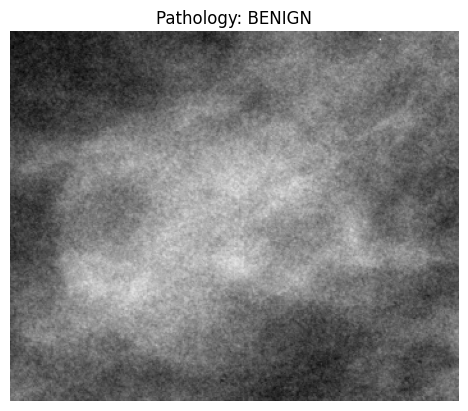

These are 5 cropped images
../data/jpeg/1.3.6.1.4.1.9590.100.1.2.381187369611524586537789902641525311317/1-052.jpg
                                           file_path  \
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  BitsAllocated  \
3  ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.38118736...             16   

   BitsStored BodyPartExamined ConversionType  HighBit  \
3          16           BREAST            WSD       15   

   LargestImagePixelValue Laterality Modality  ...  \
3                   65535          L       MG  ...   

                   PatientName PatientOrientation PhotometricInterpretation  \
3  Calc-Test_P_00562_LEFT_CC_2                 CC               MONOCHROME2   

  PixelRepresentation  SamplesPerPixel  SecondaryCaptureDeviceManufacturer  \
3                   0                1                           MathWorks   

  SecondaryCaptureDeviceManufacturerModelName SeriesDescription  \
3                   

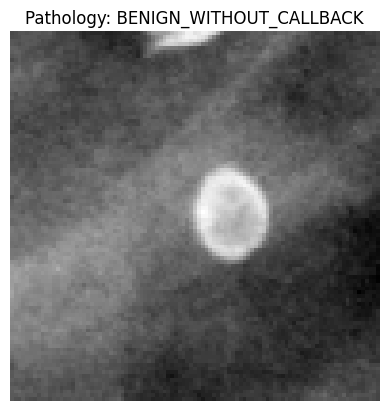

These are 5 cropped images
../data/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/1-034.jpg
                                           file_path  \
6  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.15333...   

                                          image_path  BitsAllocated  \
6  ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.15333905...             16   

   BitsStored BodyPartExamined ConversionType  HighBit  \
6          16           BREAST            WSD       15   

   LargestImagePixelValue Laterality Modality  ...  \
6                   65535          R       MG  ...   

                        PatientName PatientOrientation  \
6  Calc-Training_P_00181_RIGHT_CC_1                 CC   

  PhotometricInterpretation PixelRepresentation  SamplesPerPixel  \
6               MONOCHROME2                   0                1   

   SecondaryCaptureDeviceManufacturer  \
6                           MathWorks   

  SecondaryCaptureDeviceManufacturerModelName SeriesDescription  \

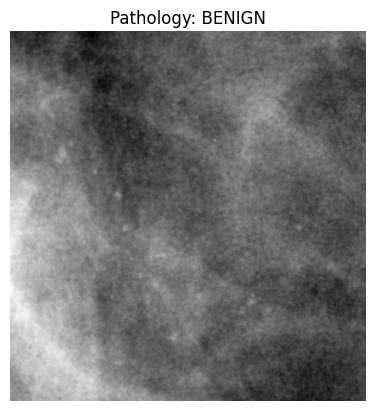

These are 5 cropped images
../data/jpeg/1.3.6.1.4.1.9590.100.1.2.178994714611485132105265512043047466091/1-149.jpg
                                           file_path  \
7  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.17899...   

                                          image_path  BitsAllocated  \
7  ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.17899471...             16   

   BitsStored BodyPartExamined ConversionType  HighBit  \
7          16           BREAST            WSD       15   

   LargestImagePixelValue Laterality Modality  ...  \
7                   65535          L       MG  ...   

                       PatientName PatientOrientation  \
7  Calc-Training_P_01015_LEFT_CC_1                 CC   

  PhotometricInterpretation PixelRepresentation  SamplesPerPixel  \
7               MONOCHROME2                   0                1   

   SecondaryCaptureDeviceManufacturer  \
7                           MathWorks   

  SecondaryCaptureDeviceManufacturerModelName SeriesDescription  \
7

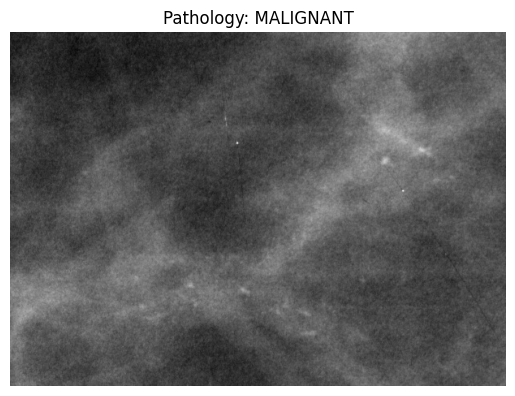

These are 5 cropped images
../data/jpeg/1.3.6.1.4.1.9590.100.1.2.411833492612373627114350673042828631265/1-003.jpg
                                            file_path  \
10  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.41183...   

                                           image_path  BitsAllocated  \
10  ../data/jpeg/1.3.6.1.4.1.9590.100.1.2.41183349...             16   

    BitsStored BodyPartExamined ConversionType  HighBit  \
10          16           BREAST            WSD       15   

    LargestImagePixelValue Laterality Modality  ...  \
10                   65535          L       MG  ...   

                        PatientName PatientOrientation  \
10  Calc-Training_P_01497_LEFT_CC_1                 CC   

   PhotometricInterpretation PixelRepresentation  SamplesPerPixel  \
10               MONOCHROME2                   0                1   

    SecondaryCaptureDeviceManufacturer  \
10                           MathWorks   

   SecondaryCaptureDeviceManufacturerModelName SeriesD

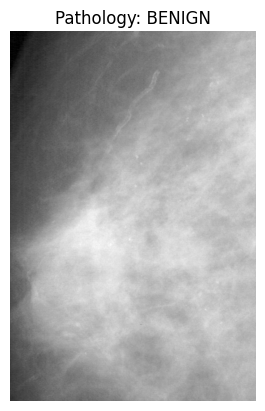

In [24]:
show(1)

In [25]:
len(full_mammogram_images)
fmi_train, fmi_test, ci_train, ci_test, rmi_train, rmi_test = 0,0,0,0,0,0
for i in range(len(full_mammogram_images)):
    file_path = full_mammogram_images.values[i]
    patient_row = dicom_cleaning_data[dicom_cleaning_data['image_path'] == file_path]
    if not patient_row.empty:
        patient_id = patient_row['PatientID'].values[0]
        if 'Training' in patient_id:
            fmi_train += 1
        if 'Test' in patient_id:
            fmi_test += 1
    else:
        break

for i in range(len(cropped_images)):
    file_path = cropped_images.values[i]
    patient_row = dicom_cleaning_data[dicom_cleaning_data['image_path'] == file_path]
    if not patient_row.empty:
        patient_id = patient_row['PatientID'].values[0]
        if 'Training' in patient_id:
            ci_train += 1
        if 'Test' in patient_id:
            ci_test += 1
    else:
        break

for i in range(len(roi_mask_images)):
    file_path = roi_mask_images.values[i]
    patient_row = dicom_cleaning_data[dicom_cleaning_data['image_path'] == file_path]
    if not patient_row.empty:
        patient_id = patient_row['PatientID'].values[0]
        if 'Training' in patient_id:
            ci_train += 1
        if 'Test' in patient_id:
            ci_test += 1
    else:
        break

train = fmi_train + ci_train + rmi_train
test = fmi_test + ci_test + rmi_test

print(train, test)

8184 1487


## Process the full mammogram images

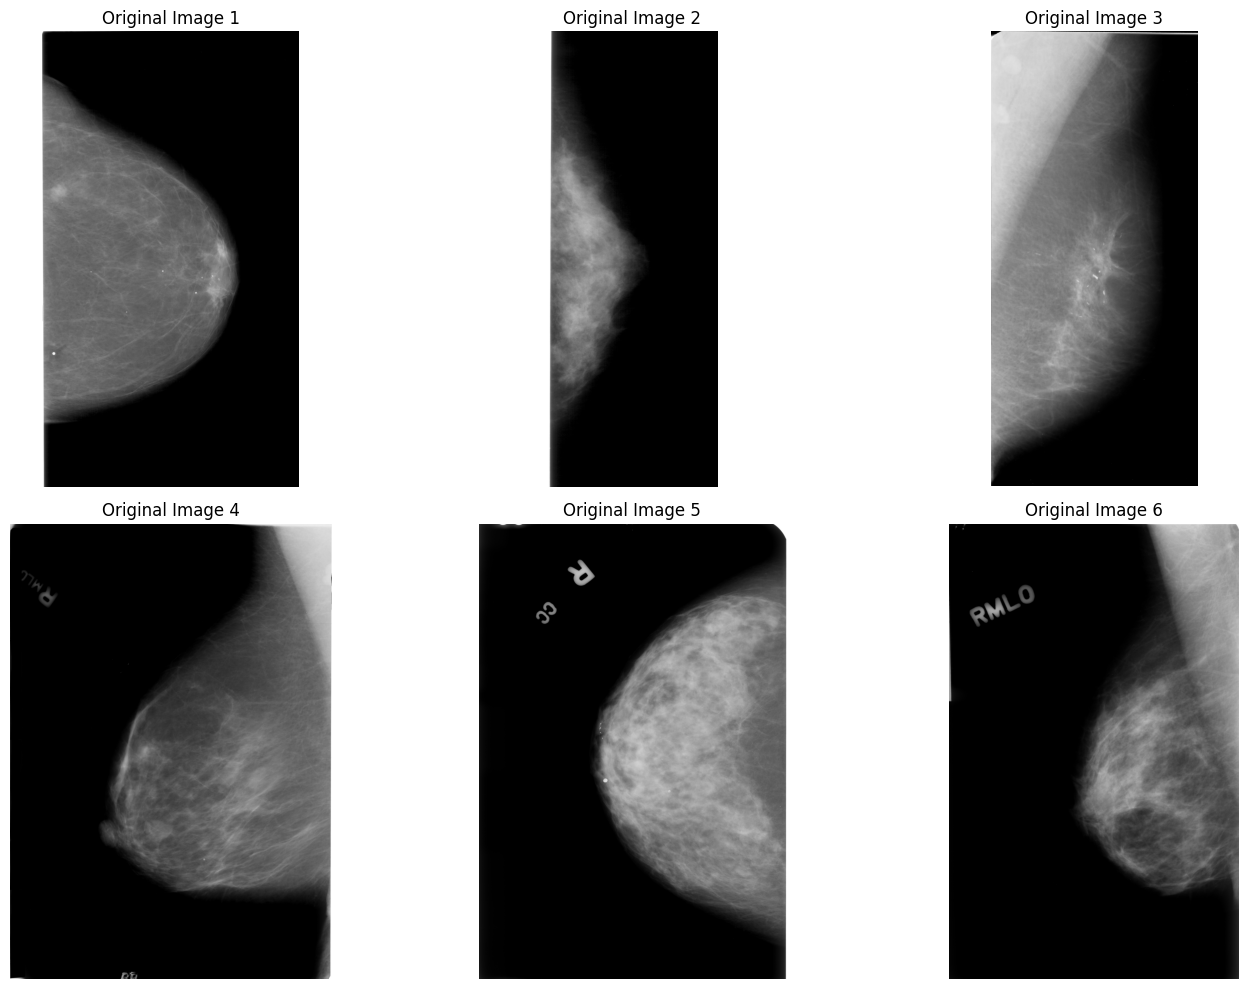

In [26]:
import cv2

# show some full mammogram images
images = []
for i in range(6):
    image = cv2.imread(full_mammogram_images.values[i])
    images.append(image)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, img in enumerate(images):
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Original Image {idx + 1}')
plt.tight_layout()
plt.show()

In [27]:
# Resize all the images
target_size = (256, 384)

def resize_image(image, target_size):
    
    resized_image = cv2.resize(image, target_size)
    return resized_image

In [28]:
# Define the preprocessing function for mammogram images
def preprocess_mammogram(image):
    # 1. Convert the image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 2. Apply CLAHE (Contrast Limited Adaptive Histogram Equalization) for contrast enhancement
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray_image)

    # 3. Apply median blur for noise reduction
    denoised_image = cv2.medianBlur(enhanced_image, 3)
    
    # 4. Normalize the image to the range [0, 1]
    normalized_image = denoised_image / 255.0
    
    return normalized_image

In [29]:
images = []
for i in range(6):
    image = cv2.imread(full_mammogram_images.values[i])
    image = resize_image(image, target_size)
    image = preprocess_mammogram(image)
    images.append(image)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, img in enumerate(images):
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Processed Image {idx + 1}')
plt.tight_layout()
plt.show()

## Process the cropped images

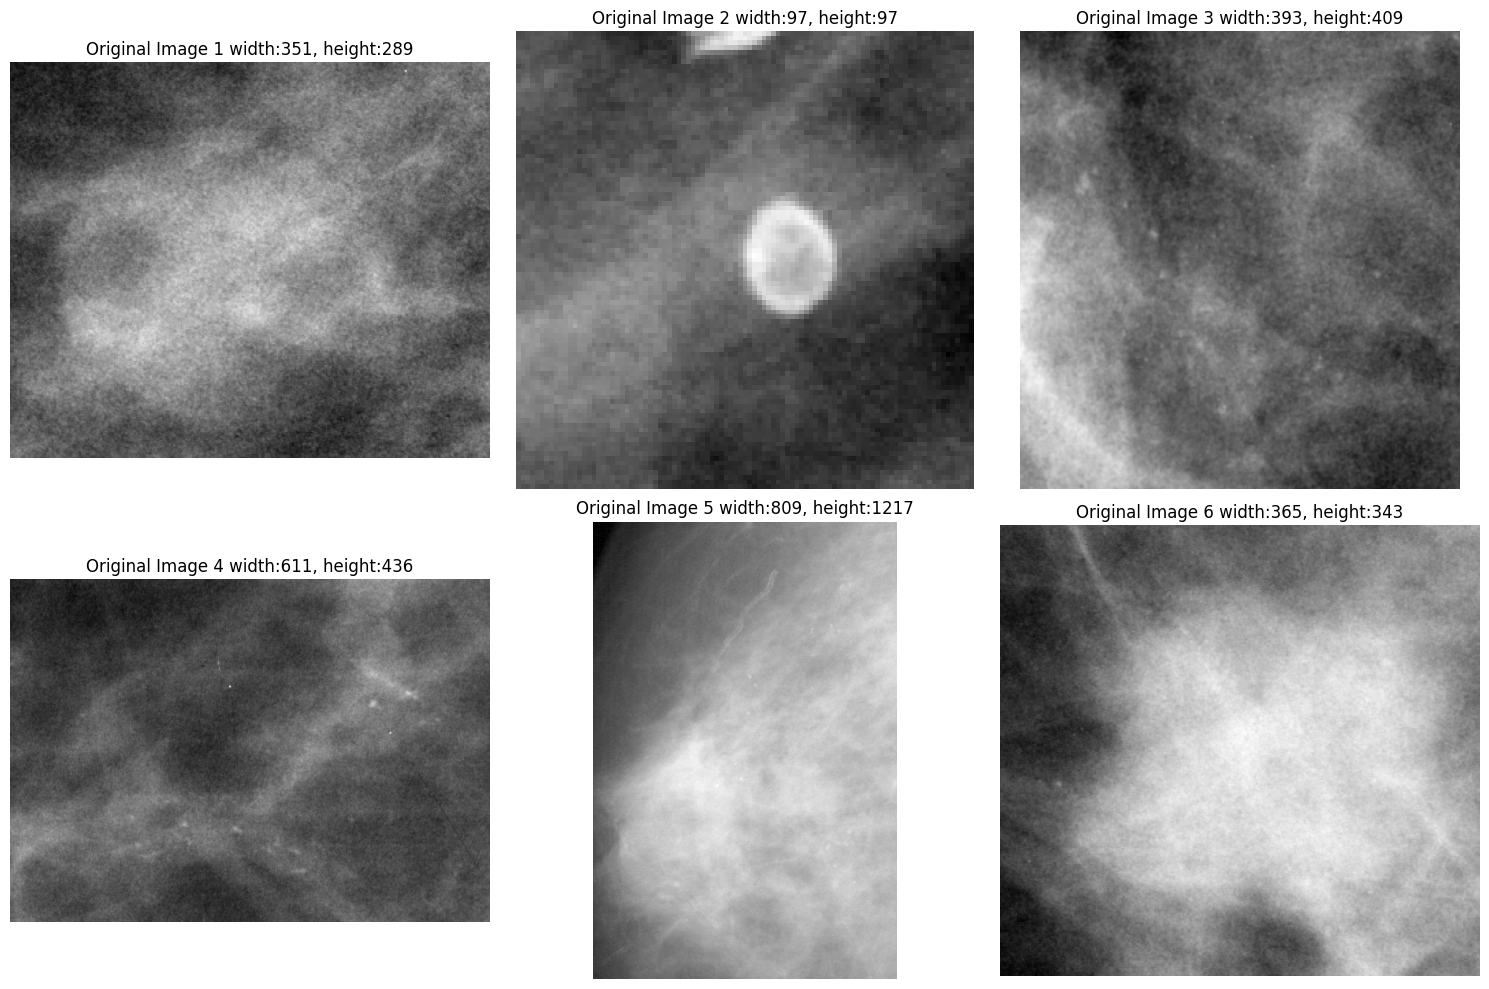

In [30]:
# Show some cropped images and their original size
images = []
widths = []
heights = []
def get_image_size(image):
    if image is not None:
        height, width = image.shape[:2]  # Get height and width
        return (width, height)  # Return as (width, height)
    else:
        return None

for i in range(6):
    image = cv2.imread(cropped_images.values[i])
    width, height = get_image_size(image)
    images.append(image)
    widths.append(width)
    heights.append(height)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, img in enumerate(images):
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Original Image {idx + 1} width:{widths[idx]}, height:{heights[idx]}')
plt.tight_layout()
plt.show()

In [31]:
def preprocess_cropped_image(image):
    # 1. Convert to grayscale (remove color channels)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 2. Gaussian blur to reduce image noise and detail (smooth out the image)
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)
    
    # 3. Histogram equalization to enhance the contrast of the image
    equalized_image = cv2.equalizeHist(blurred_image)
    
    # 4. Normalize pixel values to range [0, 1]
    normalized_image = equalized_image / 255.0

    return normalized_image

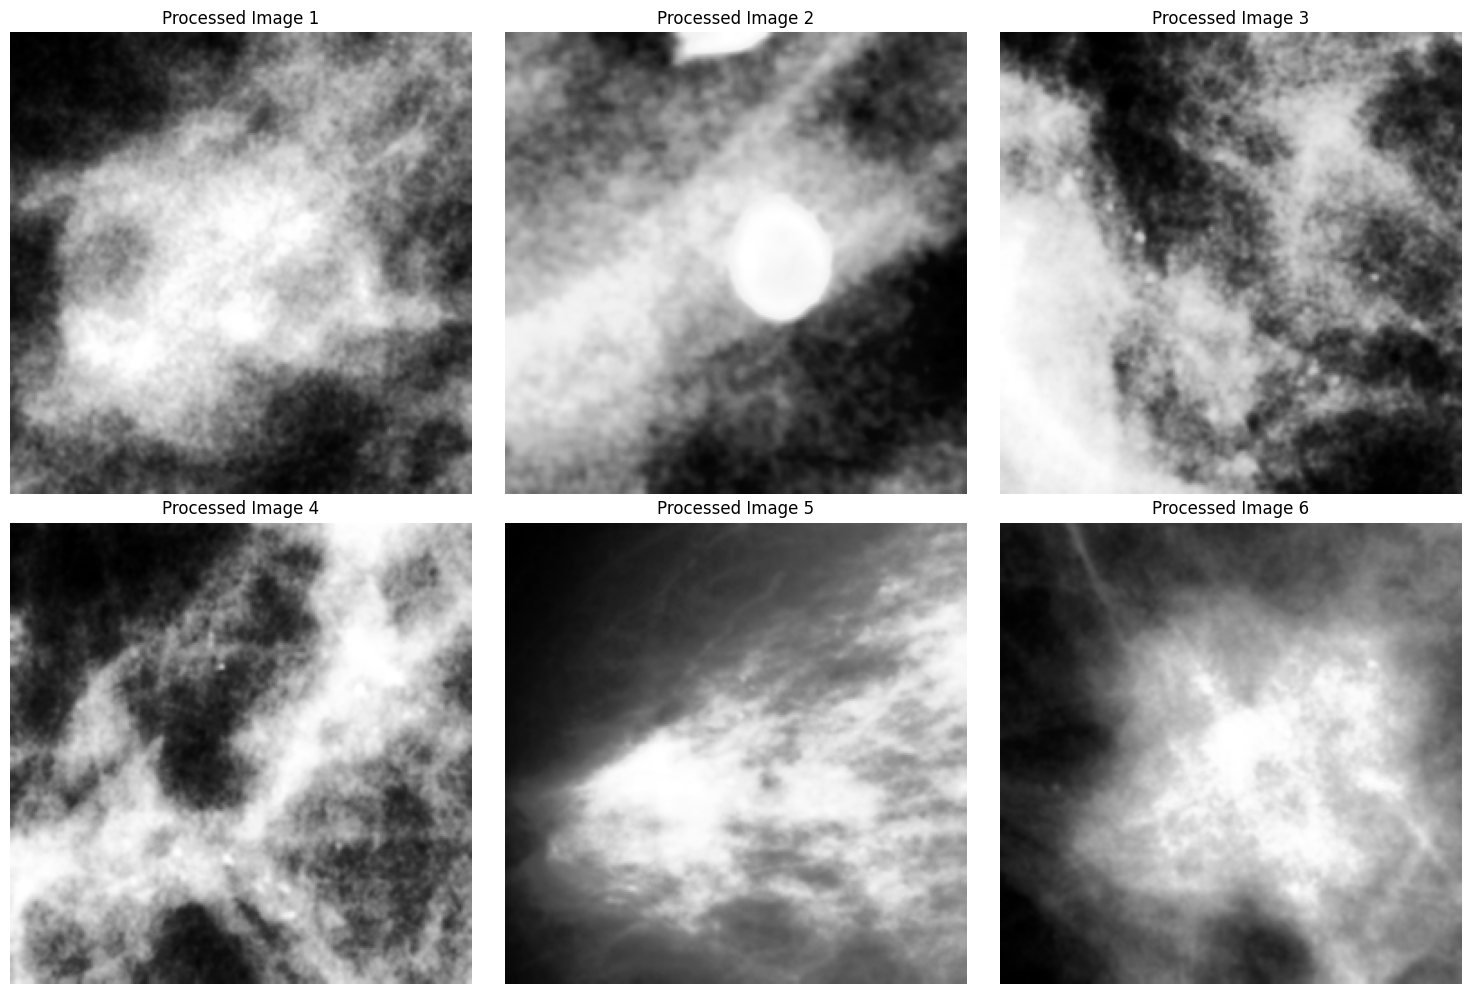

In [32]:
target_size = (256, 256)

images = []
for i in range(6):
    image = cv2.imread(cropped_images.values[i])
    image = resize_image(image, target_size)
    image = preprocess_cropped_image(image)
    images.append(image)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, img in enumerate(images):
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Processed Image {idx + 1}')
plt.tight_layout()
plt.show()

## Process the ROI masked images.

In [33]:
# show some ROI masked images and their original size
images = []
widths = []
heights = []
def get_image_size(image):
    if image is not None:
        height, width = image.shape[:2]  # Get height and width
        return (width, height)  # Return as (width, height)
    else:
        return None

for i in range(6):
    image = cv2.imread(roi_mask_images.values[i])
    width, height = get_image_size(image)
    images.append(image)
    widths.append(width)
    heights.append(height)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, img in enumerate(images):
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Original Image {idx + 1} width:{widths[idx]}, height:{heights[idx]}')
plt.tight_layout()
plt.show()

In [34]:
import numpy as np

def preprocess_roi_image(image):
    # 1. Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # 2. Binarize the image (convert to pure black and white)
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    
    # 3. Morphological operations to remove noise (using opening operation)
    kernel = np.ones((5, 5), np.uint8)
    cleaned_image = cv2.morphologyEx(binary_image, cv2.MORPH_OPEN, kernel)
    
    # 4. Normalize the pixel values to range [0, 1]
    normalized_image = cleaned_image / 255.0

    return normalized_image

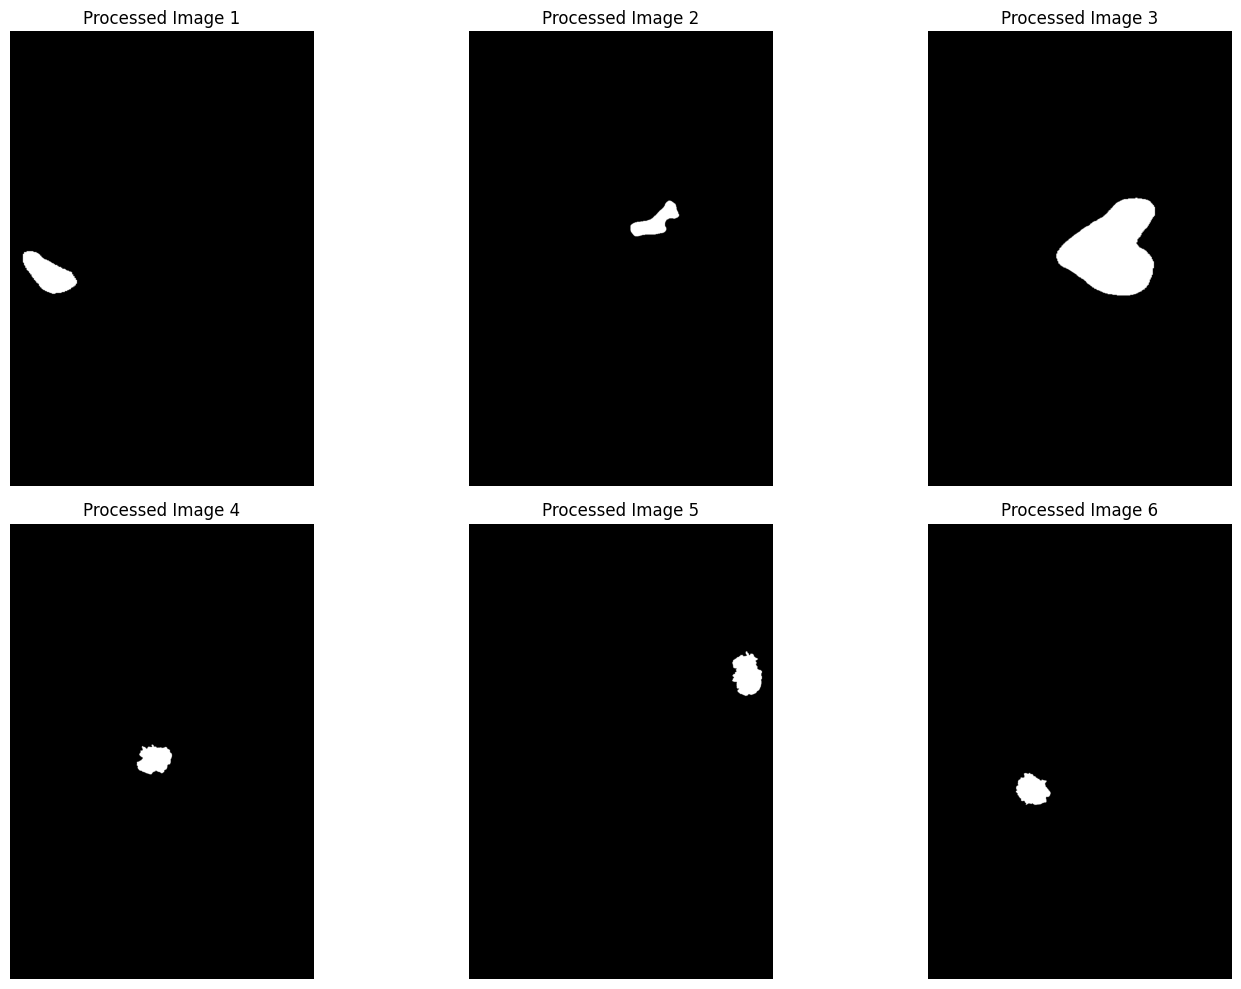

In [35]:
target_size = (2400, 3600)

images = []
for i in range(6):
    image = cv2.imread(roi_mask_images.values[i])
    image = resize_image(image, target_size)
    image = preprocess_roi_image(image)
    images.append(image)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
for idx, img in enumerate(images):
    ax = axes[idx // 3, idx % 3]
    ax.imshow(img, cmap='gray')
    ax.axis('off')
    ax.set_title(f'Processed Image {idx + 1}')
plt.tight_layout()
plt.show()

Week 4 ends here.

## **This marks the beginning of the Week 5 assignment.*

### Reduce the dimensionality of the .csv file.

In [36]:
Data_cleaning_1 = calc_train.copy()

Data_cleaning_1['calc type'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_1['calc distribution'].fillna(method = 'bfill', axis = 0, inplace=True)

/tmp/ipykernel_3351052/1139527817.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data_cleaning_1['calc type'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_3351052/1139527817.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_1['calc type'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_3351052/1139527817.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Seri

### In Calc_Case_Train csv, use Fisher Score to identify Which predictor variables are important or not

Fisher Score is a statistical feature selection method used to measure the importance of each feature in distinguishing between classes. The core idea is to evaluate the importance of a feature by analyzing the distribution of different class samples. It assesses the separability of each feature by comparing the between-class variance and the within-class variance.

The **higher** the Fisher Score, the **better** the feature’s separability, which makes it **more significant** for the classification task.

In [37]:
label_encoder = LabelEncoder()
Data_cleaning_1['pathology_encoded'] = label_encoder.fit_transform(Data_cleaning_1['pathology'])


calc_case_reduced = Data_cleaning_1.drop(columns=[
    'patient_id', 'image file path', 'cropped image file path', 'ROI mask file path', 
    'abnormality id', 'pathology_encoded', 'pathology'
])

calc_case_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   breast density        1546 non-null   int64 
 1   left or right breast  1546 non-null   object
 2   image view            1546 non-null   object
 3   abnormality type      1546 non-null   object
 4   calc type             1546 non-null   object
 5   calc distribution     1546 non-null   object
 6   assessment            1546 non-null   int64 
 7   subtlety              1546 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 96.8+ KB


In [38]:
category_columns = calc_case_reduced.select_dtypes(include=['object']).columns
calc_case_reduced_encoded = calc_case_reduced.copy()
calc_case_reduced_encoded[category_columns] = calc_case_reduced_encoded[category_columns].apply(LabelEncoder().fit_transform)

# Get the features and the target variable
features = calc_case_reduced_encoded.columns
target_variable = Data_cleaning_1['pathology_encoded']

In [39]:
fisher_scores_no_onehot = {}

for feature in features: 
    class_feature_values = [calc_case_reduced_encoded[target_variable == label][feature] for label in np.unique(target_variable)]
    # Use ANOVA to calculate Fisher Score
    fisher_score = f_oneway(*class_feature_values).statistic
    fisher_scores_no_onehot[feature] = fisher_score

/opt/tljh/user/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


In [40]:
fisher_score_no_onehot_df = pd.DataFrame(list(fisher_scores_no_onehot.items()), columns=['Feature', 'Fisher Score'])
fisher_score_no_onehot_df_sorted = fisher_score_no_onehot_df.sort_values(by='Fisher Score', ascending=False)

# Visualize the result
plt.figure(figsize=(12, 6))
plt.barh(fisher_score_no_onehot_df_sorted['Feature'], fisher_score_no_onehot_df_sorted['Fisher Score'], color='lightcoral')
plt.xlabel('Fisher Score')
plt.title('Feature Importance Based on Fisher Score')
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

From the picture, we can find out that assessment is the most important, and calc type and subtlety are also significant. What's more, the column abnormality type didn't happen in the table because the values in this column are absolutely same. Therefore, it has no reference. 

Based on the result, we decide to delete the column left or right breast and image view. Meanwhile, we will merge the calc type and calc distribution together and get a new predictor variable.

In [41]:
Calc_train_5 = Data_cleaning_1.copy()
Calc_train_5.drop(columns=[
    'patient_id', 'image file path', 'cropped image file path', 'ROI mask file path', 
    'abnormality id', 'pathology_encoded', 'abnormality type'], inplace=True
)
# Delete the column "left or right breast" and "image view"
Calc_train_5.drop(columns=['left or right breast', 'image view'], inplace=True)

Calc_train_5['calc_type_distribution'] = Data_cleaning_1['calc type'] + '_' + Data_cleaning_1['calc distribution']
Calc_train_5.drop(columns=['calc type', 'calc distribution'], inplace=True)
Calc_train_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   breast density          1546 non-null   int64 
 1   assessment              1546 non-null   int64 
 2   pathology               1546 non-null   object
 3   subtlety                1546 non-null   int64 
 4   calc_type_distribution  1546 non-null   object
dtypes: int64(3), object(2)
memory usage: 60.5+ KB


In [42]:
Calc_train_5['pathology'] = Calc_train_5['pathology'].astype('category')
Calc_train_5['calc_type_distribution'] = Calc_train_5['calc_type_distribution'].astype('category')

Calc_train_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   breast density          1546 non-null   int64   
 1   assessment              1546 non-null   int64   
 2   pathology               1546 non-null   category
 3   subtlety                1546 non-null   int64   
 4   calc_type_distribution  1546 non-null   category
dtypes: category(2), int64(3)
memory usage: 42.3 KB


### Evaluate the Mass_Case_Train csv

In [43]:
Data_cleaning_2 = mass_train.copy()

# Refer to the code Week 4
Data_cleaning_2 = Data_cleaning_2.rename(columns={'breast_density':'breast density'})
Data_cleaning_2['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2['mass margins'].fillna(method = 'bfill', axis = 0, inplace=True)
print(Data_cleaning_2.info())
print(Data_cleaning_2.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1318 non-null   object
 7   mass margins             1318 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

/tmp/ipykernel_3351052/2861112643.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Data_cleaning_2['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_3351052/2861112643.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data_cleaning_2['mass shape'].fillna(method = 'bfill', axis = 0, inplace=True)
/tmp/ipykernel_3351052/2861112643.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Se

In [44]:
Data_cleaning_2['pathology_encoded'] = LabelEncoder().fit_transform(Data_cleaning_2['pathology'])

# Get the predictor variables (Drop the unnecessary columns and the Target Variable)
predictor_variables_mass = Data_cleaning_2.drop(columns=[
    'patient_id', 'image file path', 'cropped image file path', 'ROI mask file path', 
    'abnormality id', 'pathology_encoded', 'pathology'
])
predictor_variables_mass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   breast density        1318 non-null   int64 
 1   left or right breast  1318 non-null   object
 2   image view            1318 non-null   object
 3   abnormality type      1318 non-null   object
 4   mass shape            1318 non-null   object
 5   mass margins          1318 non-null   object
 6   assessment            1318 non-null   int64 
 7   subtlety              1318 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 82.5+ KB


In [45]:
# Convert categorical variables into numerical form using LabelEncoder
category_columns_mass = predictor_variables_mass.select_dtypes(include=['object']).columns
predictor_variables_mass_encoded = predictor_variables_mass.copy()
predictor_variables_mass_encoded[category_columns_mass] = predictor_variables_mass[category_columns_mass].apply(LabelEncoder().fit_transform)

In [46]:
target_variable_mass = Data_cleaning_2['pathology_encoded']

# Fisher Score calculation
fisher_scores_mass = {}

# Calculate Fisher Score for each feature using ANOVA
for feature in predictor_variables_mass_encoded.columns:
    # Split feature values based on the target class labels
    class_feature_values_mass = [predictor_variables_mass_encoded[target_variable_mass == label][feature] for label in np.unique(target_variable_mass)]
    fisher_score_mass = f_oneway(*class_feature_values_mass).statistic
    fisher_scores_mass[feature] = fisher_score_mass

/opt/tljh/user/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


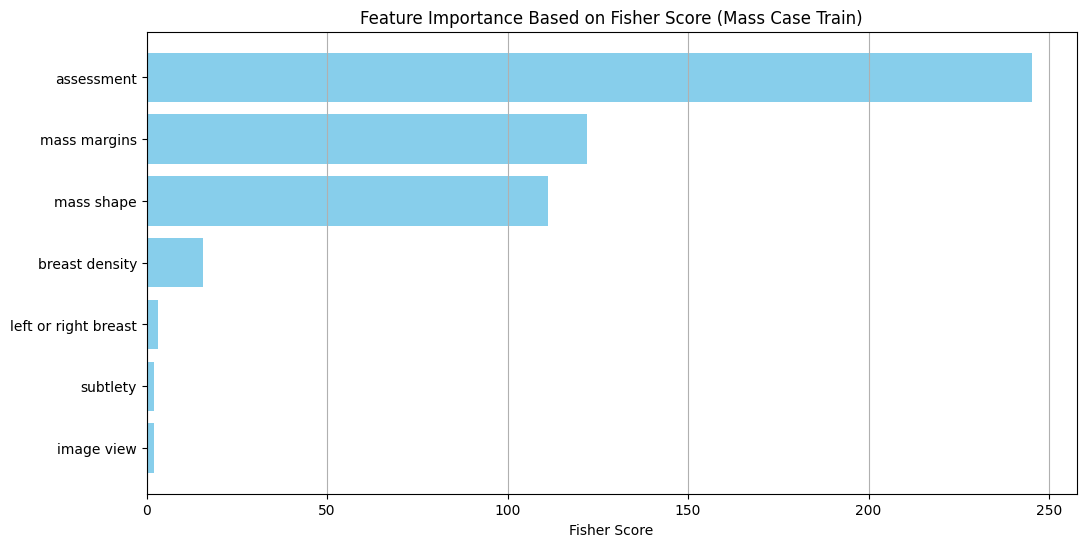

In [47]:
fisher_score_mass_df = pd.DataFrame(list(fisher_scores_mass.items()), columns=['Feature', 'Fisher Score'])
fisher_score_mass_df_sorted = fisher_score_mass_df.sort_values(by='Fisher Score', ascending=False)

plt.figure(figsize=(12, 6))
plt.barh(fisher_score_mass_df_sorted['Feature'], fisher_score_mass_df_sorted['Fisher Score'], color='skyblue')  # Create horizontal bar plot
plt.xlabel('Fisher Score')
plt.title('Feature Importance Based on Fisher Score (Mass Case Train)')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.show()

From the picture, we can find out that assessment is still the most important, and mass margins and mass shape are also significant. What's more, the column abnormality type didn't happen in the table because the values in this column are absolutely same. Therefore, it has no reference.

Based on the result, we decide to delete the column left or right breast, subtlety and image view. Meanwhile, we will merge the calc type and calc distribution together and get a new predictor variable.

In [48]:
mass_train_5 = Data_cleaning_2.copy()

mass_train_5.drop(columns=[
    'patient_id', 'image file path', 'cropped image file path', 'ROI mask file path', 
    'abnormality id', 'pathology_encoded', 'abnormality type'], inplace=True
)
mass_train_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   breast density        1318 non-null   int64 
 1   left or right breast  1318 non-null   object
 2   image view            1318 non-null   object
 3   mass shape            1318 non-null   object
 4   mass margins          1318 non-null   object
 5   assessment            1318 non-null   int64 
 6   pathology             1318 non-null   object
 7   subtlety              1318 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 82.5+ KB


In [49]:
# Drop the unnecessary column
mass_train_5.drop(columns=['left or right breast', 'image view', 'subtlety'], inplace=True)

mass_train_5['pathology'] = mass_train_5['pathology'].astype('category')
mass_train_5['mass shape'] = mass_train_5['mass shape'].astype('category')
mass_train_5['mass margins'] = mass_train_5['mass margins'].astype('category')

mass_train_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   breast density  1318 non-null   int64   
 1   mass shape      1318 non-null   category
 2   mass margins    1318 non-null   category
 3   assessment      1318 non-null   int64   
 4   pathology       1318 non-null   category
dtypes: category(3), int64(2)
memory usage: 26.1 KB


## Data Augmentation for the images

### 1. Small Angle Rotation and Randomly Scale

In [50]:
def rotate_and_scale_image(image, angle, scale_factor):

    # get the height and the width of the image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    
    # rotate the image
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=0)
    
    # generate the new size
    new_h, new_w = int(h * scale_factor), int(w * scale_factor)

    # scale the image
    scaled_image = cv2.resize(rotated_image, (new_w, new_h), interpolation=cv2.INTER_LINEAR)

    # Crop or fill the scaled image in order to back to its original size
    if scale_factor < 1.0:
        top_pad = (h - new_h) // 2
        bottom_pad = h - new_h - top_pad
        left_pad = (w - new_w) // 2
        right_pad = w - new_w - left_pad

        scaled_image = cv2.copyMakeBorder(scaled_image, top_pad, bottom_pad, left_pad, right_pad, borderType=cv2.BORDER_CONSTANT, value=0)

    elif scale_factor > 1.0:
        start_x = (new_w - w) // 2
        start_y = (new_h - h) // 2
        scaled_image = scaled_image[start_y:start_y + h, start_x:start_x + w]

    return scaled_image

def display_images(original_images, blurred_images, titles):

    plt.figure(figsize=(15, 10))
    
    for i, (img, title) in enumerate(zip(original_images, titles[:3])):
        plt.subplot(2, 3, i + 1)  # Two rows, three columns, fill the first row
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')

    # Display the blurred images in the second row
    for i, (img, title) in enumerate(zip(blurred_images, titles[3:])):
        plt.subplot(2, 3, i + 4)  # Two rows, three columns, fill the second row
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')

    plt.show()

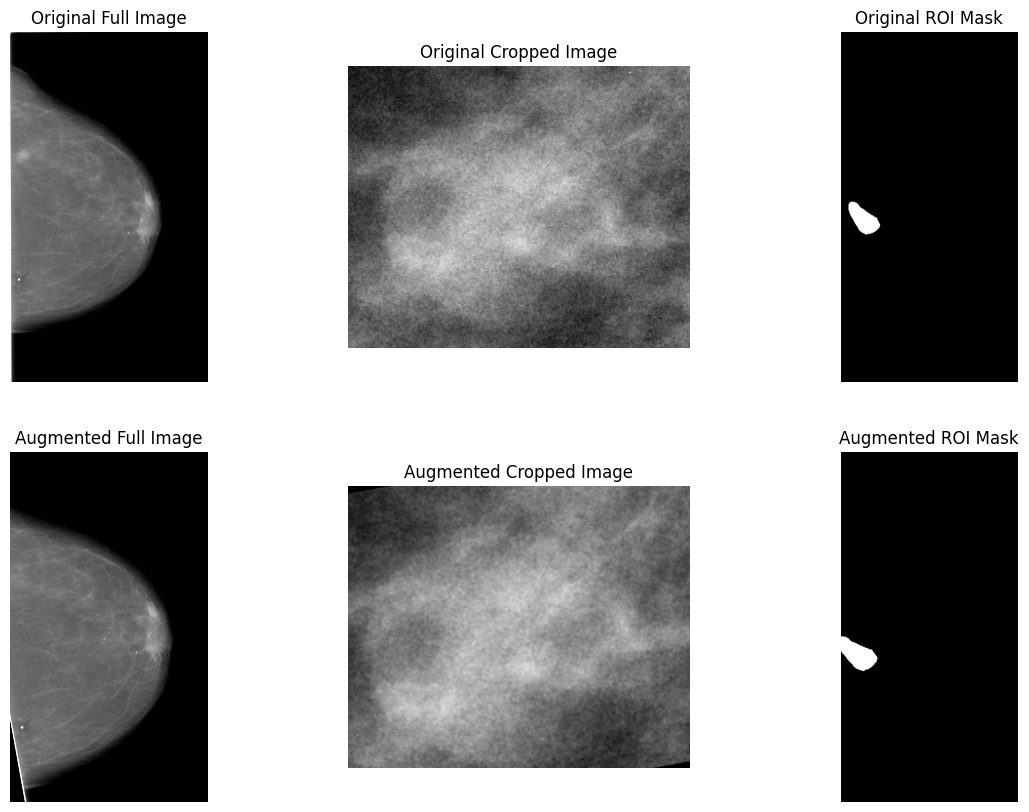

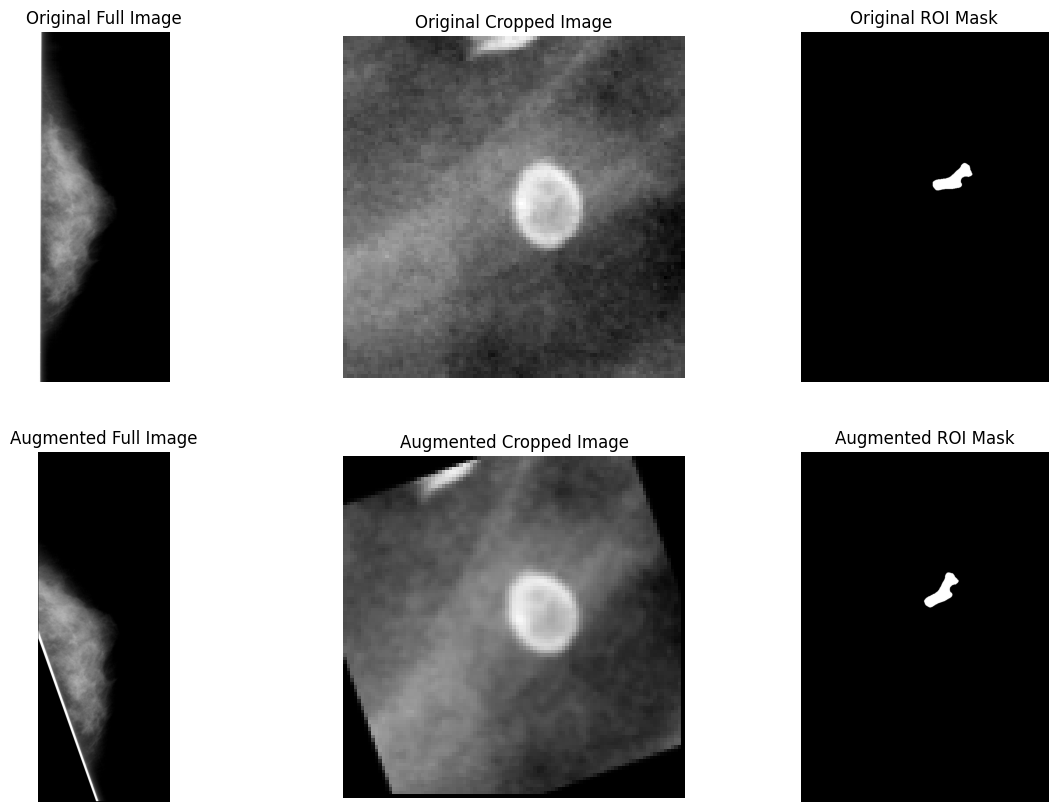

In [51]:
rotation_angle_range = (10, 20) # from 10 to 20
scale_range = (0.8, 1.2) # from 0.8 to 1.2

for i in range(2):
    full_image = cv2.imread(full_mammogram_images.values[i])
    cropped_image = cv2.imread(cropped_images.values[i])
    roi_mask = cv2.imread(roi_mask_images.values[i])

    # generate the angle and scale factor
    rotation_angle = random.uniform(rotation_angle_range[0], rotation_angle_range[1])
    scale_factor = random.uniform(scale_range[0], scale_range[1])

    rotate_and_scale_full_image = rotate_and_scale_image(full_image, rotation_angle, scale_factor)
    rotate_and_scale_cropped_image = rotate_and_scale_image(cropped_image, rotation_angle, scale_factor)
    rotate_and_scale_roi_mask = rotate_and_scale_image(roi_mask, rotation_angle, scale_factor)

    original_images = [full_image, cropped_image, roi_mask]
    augmented_images = [rotate_and_scale_full_image, rotate_and_scale_cropped_image, rotate_and_scale_roi_mask]

    titles = [
    "Original Full Image", "Original Cropped Image", "Original ROI Mask",
    "Augmented Full Image", "Augmented Cropped Image", "Augmented ROI Mask"
    ]

    display_images(original_images, augmented_images, titles)

### 2. Gaussian Blur

In [52]:
def apply_gaussian_blur(image, kernel_size=(5, 5), sigma=1.0):
    """
    Apply Gaussian blur to the input image.
    Args:
    - image: Input image (numpy array)
    - kernel_size: Size of the Gaussian kernel (must be odd, e.g., (5, 5))
    - sigma: Standard deviation for the Gaussian distribution (controls blur intensity)

    Returns:
    - blurred_image: Blurred image after Gaussian blur is applied
    """
    blurred_image = cv2.GaussianBlur(image, kernel_size, sigmaX=sigma, sigmaY=sigma)
    return blurred_image

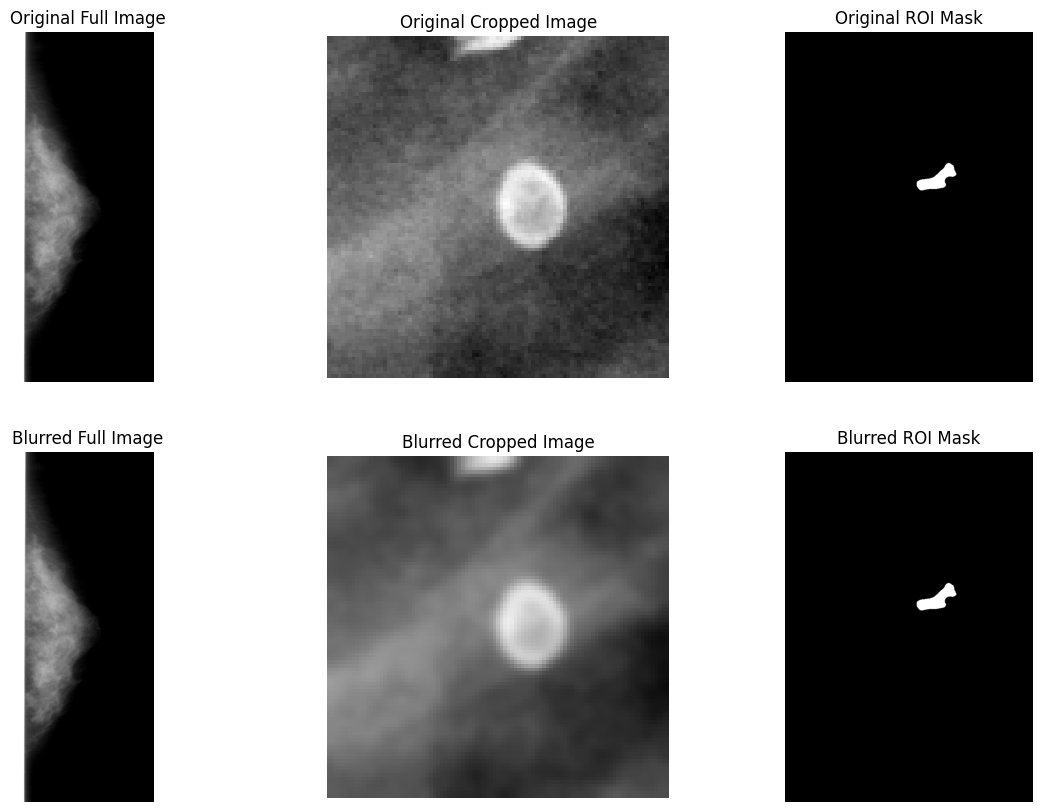

In [53]:
for i in range(2):
    full_image = cv2.imread(full_mammogram_images.values[i])
    cropped_image = cv2.imread(cropped_images.values[i])
    roi_mask = cv2.imread(roi_mask_images.values[i])

    # Randomly select the kernel size from (3, 3), (5, 5), and (7, 7). Size of the Gaussian kernel must be odd
    kernel_size = random.choice([(3, 3), (5, 5), (7, 7)])
    # Standard deviation for Gaussian blur
    sigma = random.uniform(1, 2)

    blurred_full_image = apply_gaussian_blur(full_image, kernel_size, sigma)
    blurred_cropped_image = apply_gaussian_blur(cropped_image, kernel_size, sigma)
    blurred_roi_mask = apply_gaussian_blur(roi_mask, kernel_size, sigma)

    original_images = [full_image, cropped_image, roi_mask]
    blurred_images = [blurred_full_image, blurred_cropped_image, blurred_roi_mask]

    titles = [
    "Original Full Image", "Original Cropped Image", "Original ROI Mask",
    "Blurred Full Image", "Blurred Cropped Image", "Blurred ROI Mask"
    ]

    display_images(original_images, blurred_images, titles)